In [2]:

from tensorflow.keras.layers import Dense,Flatten,Conv2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
import cv2

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



In [16]:
training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 3448 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [17]:
model_saved=model.fit(
        training_set,
        epochs=5,
        validation_data=test_set,

        )


Epoch 1/5
153/216 [====================>.........] - ETA: 1:34 - loss: 0.3626 - accuracy: 0.8361

c:\Users\sys\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


216/216 [==============================] - 349s 2s/step - loss: 0.3110 - accuracy: 0.8648 - val_loss: 0.1014 - val_accuracy: 0.9556
Epoch 2/5
216/216 [==============================] - 318s 1s/step - loss: 0.1828 - accuracy: 0.9374 - val_loss: 0.0918 - val_accuracy: 0.9556
Epoch 3/5
216/216 [==============================] - 321s 1s/step - loss: 0.1550 - accuracy: 0.9461 - val_loss: 0.0913 - val_accuracy: 0.9667
Epoch 4/5
216/216 [==============================] - 327s 2s/step - loss: 0.1432 - accuracy: 0.9501 - val_loss: 0.0797 - val_accuracy: 0.9556
Epoch 5/5
216/216 [==============================] - 317s 1s/step - loss: 0.1401 - accuracy: 0.9475 - val_loss: 0.0766 - val_accuracy: 0.9778


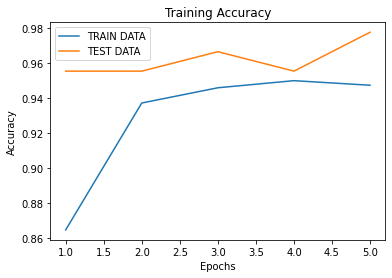

In [18]:
plt.plot(range(1,6),model_saved.history['accuracy'],label="TRAIN DATA")
plt.plot(range(1,6),model_saved.history['val_accuracy'],label="TEST DATA")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.show()

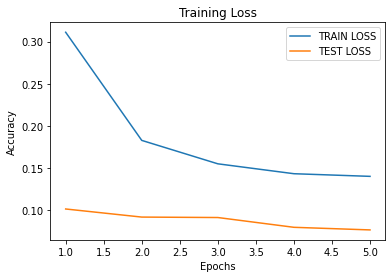

In [19]:
plt.plot(range(1,6),model_saved.history['loss'],label="TRAIN LOSS")
plt.plot(range(1,6),model_saved.history['val_loss'],label="TEST LOSS")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Loss")
plt.legend()
plt.show()

In [20]:
model.save('mymodel.h2',model_saved)


INFO:tensorflow:Assets written to: mymodel.h2\assets


INFO:tensorflow:Assets written to: mymodel.h2\assets


In [30]:
#model.save('mymodel.h5',model_saved)


In [9]:
#model.save('mymodel.h6',model_saved)


INFO:tensorflow:Assets written to: mymodel.h6\assets


INFO:tensorflow:Assets written to: mymodel.h6\assets


In [21]:
from tensorflow.keras.models import Model
import tensorflow as tf
import datetime

In [22]:
mymodel=tf.keras.models.load_model('mymodel.h2')

In [23]:
cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [24]:
while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=mymodel.predict(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO Mask',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 132ms/step
